In [10]:
import numpy as np 
#np.random.seed(0)

In [12]:
from matplotlib import pyplot as plt

In [11]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [3]:
#Input datasets
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

In [4]:
epochs = 10000
lr = 0.1
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

In [5]:
#Random weights and bias initialization
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

In [6]:
print("Initial hidden weights: ",end='')
print(*hidden_weights)
print("Initial hidden biases: ",end='')
print(*hidden_bias)
print("Initial output weights: ",end='')
print(*output_weights)
print("Initial output biases: ",end='')
print(*output_bias)

Initial hidden weights: [0.15801344 0.18850933] [0.07041685 0.81426073]
Initial hidden biases: [0.00825946 0.04398577]
Initial output weights: [0.82994479] [0.95435157]
Initial output biases: [0.52029899]


In [22]:
error_array=[]
#Training algorithm
for _ in range(epochs):
    #Forward Propagation
    hidden_layer_activation = np.dot(inputs,hidden_weights)
    hidden_layer_activation += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output,output_weights)
    output_layer_activation += output_bias
    predicted_output = sigmoid(output_layer_activation)

    #Backpropagation
    error = expected_output - predicted_output
    error_array.append(error.sum())
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    #Updating Weights and Biases
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
    output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
    hidden_weights += inputs.T.dot(d_hidden_layer) * lr
    hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

In [9]:
print("Final hidden weights: ",end='')
print(*hidden_weights)
print("Final hidden bias: ",end='')
print(*hidden_bias)
print("Final output weights: ",end='')
print(*output_weights)
print("Final output bias: ",end='')
print(*output_bias)

print("\nOutput from neural network after 10,000 epochs: ",end='')
print(*predicted_output)

Final hidden weights: [3.56551167 5.80740456] [3.56386035 5.79761515]
Final hidden bias: [-5.43126285 -2.33134945]
Final output weights: [-7.70927423] [7.18549804]
Final output bias: [-3.24863045]

Output from neural network after 10,000 epochs: [0.06625105] [0.93627047] [0.93630506] [0.07042388]


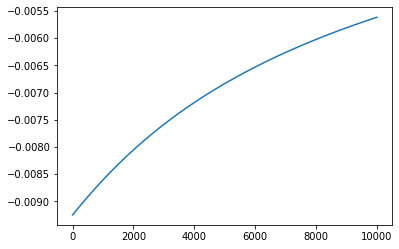

In [21]:
plt.plot(error_array)

In [15]:
len(error)

4